Compare linear filters predicting DAN activity from behavior within and across conditions.

In [1]:
%matplotlib inline
from itertools import product as c_product
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from disp import set_font_size


EXPTS = ['ASENSORY_AZ', 'CL_360_LOWFLOW_ACV', 'CL_180_HighFlow_ACV']
TARGS = ['G2', 'G3', 'G4', 'G5']
SRCS = ['FORVEL', 'ABSANGVEL', 'MOTION', 'ABSHEADING']
SFX = 'T_WDW_-4.0_4.0_MVNG_ONLY'

LOAD_DIR = os.path.join('data_', '_RESULTS', 'DAN_FROM_BEHAV_FILTERS')
LOAD_DIR_CTL = os.path.join('data_', '_RESULTS', 'DAN_FROM_BEHAV_FILTERS_SHFT_CTL')
SAVE_DIR = os.path.join('data_', '_RESULTS', 'DAN_FROM_BEHAV_FILTERS')

ASENSORY_AZ VS ASENSORY_AZ, G2_FROM_FORVEL: T = 17.7547, P = 3.8809321537203743e-70
ASENSORY_AZ VS ASENSORY_AZ, G3_FROM_FORVEL: T = 12.6390, P = 1.6227486167596645e-36
ASENSORY_AZ VS ASENSORY_AZ, G4_FROM_FORVEL: T = 33.6524, P = 2.314624676547731e-243
ASENSORY_AZ VS ASENSORY_AZ, G5_FROM_FORVEL: T = 13.1141, P = 3.5775608402215526e-39
ASENSORY_AZ VS ASENSORY_AZ, G2_FROM_ABSANGVEL: T = 25.9273, P = 1.8417024690759611e-146
ASENSORY_AZ VS ASENSORY_AZ, G3_FROM_ABSANGVEL: T = 38.8980, P = 0.0
ASENSORY_AZ VS ASENSORY_AZ, G4_FROM_ABSANGVEL: T = 11.7811, P = 5.82299423496337e-32
ASENSORY_AZ VS ASENSORY_AZ, G5_FROM_ABSANGVEL: T = 2.4613, P = 0.013851391526569983
ASENSORY_AZ VS ASENSORY_AZ, G2_FROM_MOTION: T = 10.9301, P = 9.432492032661931e-28
ASENSORY_AZ VS ASENSORY_AZ, G3_FROM_MOTION: T = 18.9288, P = 2.0975014111158193e-79
ASENSORY_AZ VS ASENSORY_AZ, G4_FROM_MOTION: T = 1.0766, P = 0.28166021081866044
ASENSORY_AZ VS ASENSORY_AZ, G5_FROM_MOTION: T = 2.9425, P = 0.0032588594482885792
ASENSORY_A

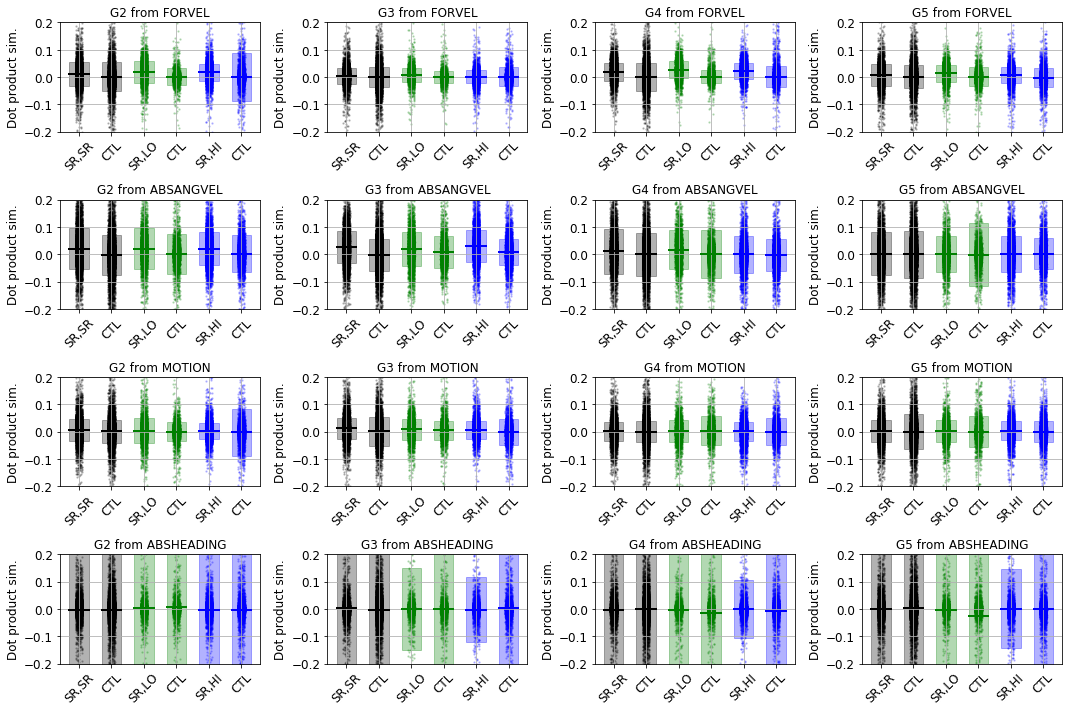

In [6]:
PAIRS = [
    ('ASENSORY_AZ', 'ASENSORY_AZ'),
    ('ASENSORY_AZ', 'CL_360_LOWFLOW_ACV'),
    ('ASENSORY_AZ', 'CL_180_HighFlow_ACV'),
]

COLORS = {
    ('ASENSORY_AZ', 'ASENSORY_AZ'): 'k',
    ('ASENSORY_AZ', 'CL_360_LOWFLOW_ACV'): 'g',
    ('ASENSORY_AZ', 'CL_180_HighFlow_ACV'): 'b',
}

LABELS = {
    ('ASENSORY_AZ', 'ASENSORY_AZ'): 'SR,SR',
    ('ASENSORY_AZ', 'CL_360_LOWFLOW_ACV'): 'SR,LO',
    ('ASENSORY_AZ', 'CL_180_HighFlow_ACV'): 'SR,HI',
}

fig, axs = plt.subplots(len(SRCS), len(TARGS), figsize=(15, 10), tight_layout=True)

for p_ctr, (expt_0, expt_1) in enumerate(PAIRS):
    df_cols = ['{}_FROM_{}'.format(targ, src) for targ, src in c_product(TARGS, SRCS)] +\
        ['{}_FROM_{}_CTL'.format(targ, src) for targ, src in c_product(TARGS, SRCS)]
    df_data = {}
    for src, ax_row in zip(SRCS, axs):
        for targ, ax in zip(TARGS, ax_row):
            
            # load filters for both expts
            hs_0 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_0, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            hs_1 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_1, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            smtys = hs_0.dot(hs_1.T)
            if expt_0 == expt_1:
                smtys[np.triu(np.ones((len(hs_0), len(hs_0)), bool), k=-1)] = np.nan

            smtys = smtys.flatten()
            df_data['{}_FROM_{}'.format(targ, src)] = smtys
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr + np.random.uniform(-.1, .1, len(smtys))
            ax.scatter(xs, smtys, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean = np.array([np.nanmean(smtys), np.nanmean(smtys)])
            y_std = np.array([np.nanstd(smtys), np.nanstd(smtys)])
            
            ax.plot([2*p_ctr-.3, 2*p_ctr+.3], [np.nanmean(smtys), np.nanmean(smtys)], lw=2, color=c)
            ax.fill_between([2*p_ctr-.3, 2*p_ctr+.3], y_mean-y_std, y_mean+y_std, color=c, alpha=.3)
            
            # calc and plot shuffled data
            hs_1_ctl = pd.read_csv(os.path.join(
                LOAD_DIR_CTL, '{}_{}_FROM_{}_{}.csv'.format(expt_1, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values
            
            smtys_ctl = hs_0.dot(hs_1_ctl.T)
            if expt_0 == expt_1:
                np.fill_diagonal(smtys_ctl, np.nan)

            smtys_ctl = smtys_ctl.flatten()
            
            df_data['{}_FROM_{}_CTL'.format(targ, src)] = smtys_ctl
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr+1 + np.random.uniform(-.1, .1, len(smtys_ctl))
            ax.scatter(xs, smtys_ctl, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean_ctl = np.array([np.nanmean(smtys_ctl), np.nanmean(smtys_ctl)])
            y_std_ctl = np.array([np.nanstd(smtys_ctl), np.nanstd(smtys_ctl)])
            
            ax.plot([2*p_ctr+1-.3, 2*p_ctr+1+.3], [y_mean_ctl, y_mean_ctl], lw=2, color=c)
            ax.fill_between([2*p_ctr+1-.3, 2*p_ctr+1+.3], y_mean_ctl-y_std_ctl, y_mean_ctl+y_std_ctl, color=c, alpha=.3)
            
            ax.set_ylim(-.2, .2)
            
            ax.set_title('{} from {}'.format(targ, src))
            
            t_val, p_val = stats.ttest_ind(smtys[~np.isnan(smtys)], smtys_ctl[~np.isnan(smtys_ctl)])
            
            print(
                '{} VS {}, {}_FROM_{}:'.format(expt_0, expt_1, targ, src),
                'T = {0:.4f}, P = {1}'.format(t_val, p_val))
            
    df = pd.DataFrame(data=df_data, columns=df_cols)
    df.to_csv(os.path.join(
        SAVE_DIR, 'FILTER_COMPARISONS_{}_VS_{}_{}.csv'.format(expt_0, expt_1, SFX)), index=False, na_rep='NaN')
    
for ax in axs.flatten():
    ax.set_xticks(range(2*len(PAIRS)))
    ax.set_xticklabels(sum([[LABELS[pair], 'CTL'] for pair in PAIRS], []), rotation=45)
    ax.set_ylabel('Dot product sim.')
    ax.grid()
    set_font_size(ax, 12)
    
fig.savefig(os.path.join(SAVE_DIR, 'FILTER_COMPARISONS_{}_VS_OTHERS_{}.png'.format(expt_0, SFX)), dpi=150)

CL_360_LOWFLOW_ACV VS ASENSORY_AZ, G2_FROM_FORVEL: T = 23.2551, P = 9.580176481656934e-116
CL_360_LOWFLOW_ACV VS ASENSORY_AZ, G3_FROM_FORVEL: T = 14.0225, P = 3.8540312547009173e-44
CL_360_LOWFLOW_ACV VS ASENSORY_AZ, G4_FROM_FORVEL: T = 39.1838, P = 6.547046287173536e-307
CL_360_LOWFLOW_ACV VS ASENSORY_AZ, G5_FROM_FORVEL: T = 17.8143, P = 1.2652520005103154e-69
CL_360_LOWFLOW_ACV VS ASENSORY_AZ, G2_FROM_ABSANGVEL: T = 13.4102, P = 1.4682054367035644e-40
CL_360_LOWFLOW_ACV VS ASENSORY_AZ, G3_FROM_ABSANGVEL: T = 17.2073, P = 3.6268867801603165e-65
CL_360_LOWFLOW_ACV VS ASENSORY_AZ, G4_FROM_ABSANGVEL: T = 11.2206, P = 5.364453164039978e-29
CL_360_LOWFLOW_ACV VS ASENSORY_AZ, G5_FROM_ABSANGVEL: T = 0.2283, P = 0.8193944646818307
CL_360_LOWFLOW_ACV VS ASENSORY_AZ, G2_FROM_MOTION: T = 2.5854, P = 0.009744104878386478
CL_360_LOWFLOW_ACV VS ASENSORY_AZ, G3_FROM_MOTION: T = 6.8046, P = 1.0880365863714782e-11
CL_360_LOWFLOW_ACV VS ASENSORY_AZ, G4_FROM_MOTION: T = 2.0409, P = 0.041294250877770215


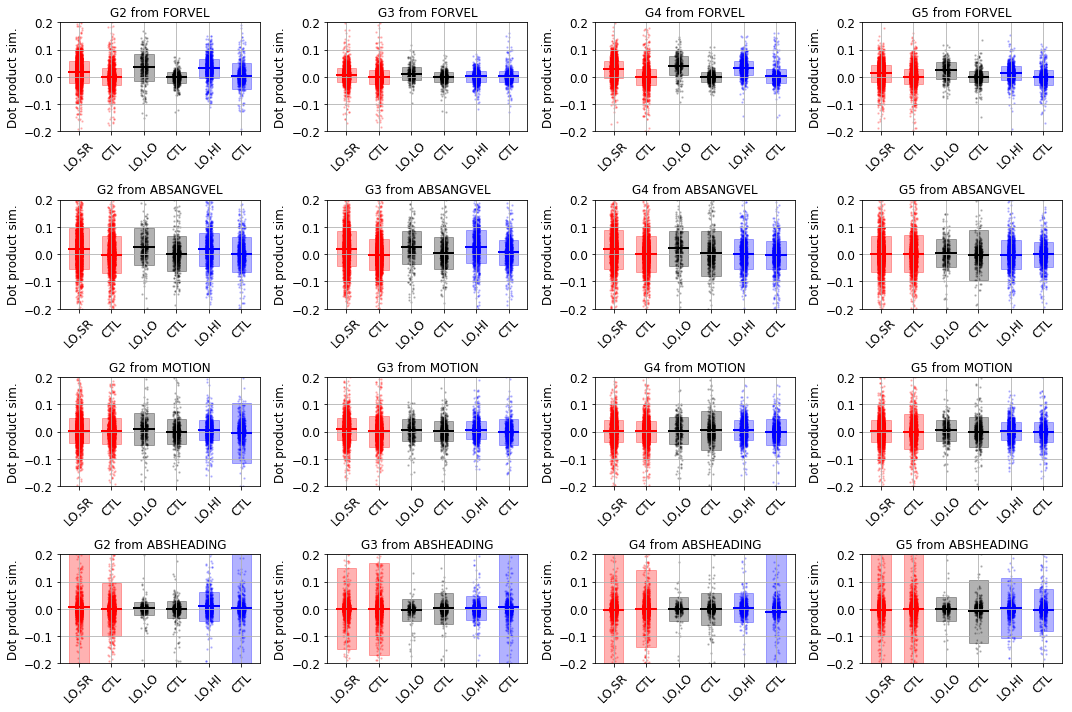

In [7]:
PAIRS = [
    ('CL_360_LOWFLOW_ACV', 'ASENSORY_AZ'),
    ('CL_360_LOWFLOW_ACV', 'CL_360_LOWFLOW_ACV'),
    ('CL_360_LOWFLOW_ACV', 'CL_180_HighFlow_ACV'),
]

COLORS = {
    ('CL_360_LOWFLOW_ACV', 'ASENSORY_AZ'): 'r',
    ('CL_360_LOWFLOW_ACV', 'CL_360_LOWFLOW_ACV'): 'k',
    ('CL_360_LOWFLOW_ACV', 'CL_180_HighFlow_ACV'): 'b',
}

LABELS = {
    ('CL_360_LOWFLOW_ACV', 'ASENSORY_AZ'): 'LO,SR',
    ('CL_360_LOWFLOW_ACV', 'CL_360_LOWFLOW_ACV'): 'LO,LO',
    ('CL_360_LOWFLOW_ACV', 'CL_180_HighFlow_ACV'): 'LO,HI',
}

fig, axs = plt.subplots(len(SRCS), len(TARGS), figsize=(15, 10), tight_layout=True)

for p_ctr, (expt_0, expt_1) in enumerate(PAIRS):
    df_cols = ['{}_FROM_{}'.format(targ, src) for targ, src in c_product(TARGS, SRCS)] +\
        ['{}_FROM_{}_CTL'.format(targ, src) for targ, src in c_product(TARGS, SRCS)]
    df_data = {}
    for src, ax_row in zip(SRCS, axs):
        for targ, ax in zip(TARGS, ax_row):
            
            # load filters for both expts
            hs_0 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_0, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            hs_1 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_1, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            smtys = hs_0.dot(hs_1.T)
            if expt_0 == expt_1:
                smtys[np.triu(np.ones((len(hs_0), len(hs_0)), bool), k=-1)] = np.nan

            smtys = smtys.flatten()
            df_data['{}_FROM_{}'.format(targ, src)] = smtys
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr + np.random.uniform(-.1, .1, len(smtys))
            ax.scatter(xs, smtys, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean = np.array([np.nanmean(smtys), np.nanmean(smtys)])
            y_std = np.array([np.nanstd(smtys), np.nanstd(smtys)])
            
            ax.plot([2*p_ctr-.3, 2*p_ctr+.3], [np.nanmean(smtys), np.nanmean(smtys)], lw=2, color=c)
            ax.fill_between([2*p_ctr-.3, 2*p_ctr+.3], y_mean-y_std, y_mean+y_std, color=c, alpha=.3)
            
            # calc and plot shuffled data
            hs_1_ctl = pd.read_csv(os.path.join(
                LOAD_DIR_CTL, '{}_{}_FROM_{}_{}.csv'.format(expt_1, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values
            
            smtys_ctl = hs_0.dot(hs_1_ctl.T)
            if expt_0 == expt_1:
                np.fill_diagonal(smtys_ctl, np.nan)

            smtys_ctl = smtys_ctl.flatten()
            
            df_data['{}_FROM_{}_CTL'.format(targ, src)] = smtys_ctl
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr+1 + np.random.uniform(-.1, .1, len(smtys_ctl))
            ax.scatter(xs, smtys_ctl, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean_ctl = np.array([np.nanmean(smtys_ctl), np.nanmean(smtys_ctl)])
            y_std_ctl = np.array([np.nanstd(smtys_ctl), np.nanstd(smtys_ctl)])
            
            ax.plot([2*p_ctr+1-.3, 2*p_ctr+1+.3], [y_mean_ctl, y_mean_ctl], lw=2, color=c)
            ax.fill_between([2*p_ctr+1-.3, 2*p_ctr+1+.3], y_mean_ctl-y_std_ctl, y_mean_ctl+y_std_ctl, color=c, alpha=.3)
            
            ax.set_ylim(-.2, .2)
            
            ax.set_title('{} from {}'.format(targ, src))
            
            t_val, p_val = stats.ttest_ind(smtys[~np.isnan(smtys)], smtys_ctl[~np.isnan(smtys_ctl)])
            
            print(
                '{} VS {}, {}_FROM_{}:'.format(expt_0, expt_1, targ, src),
                'T = {0:.4f}, P = {1}'.format(t_val, p_val))
            
    df = pd.DataFrame(data=df_data, columns=df_cols)
    df.to_csv(os.path.join(
        SAVE_DIR, 'FILTER_COMPARISONS_{}_VS_{}_{}.csv'.format(expt_0, expt_1, SFX)), index=False, na_rep='NaN')
    
for ax in axs.flatten():
    ax.set_xticks(range(2*len(PAIRS)))
    ax.set_xticklabels(sum([[LABELS[pair], 'CTL'] for pair in PAIRS], []), rotation=45)
    ax.set_ylabel('Dot product sim.')
    ax.grid()
    set_font_size(ax, 12)
    
fig.savefig(os.path.join(SAVE_DIR, 'FILTER_COMPARISONS_{}_VS_OTHERS_{}.png'.format(expt_0, SFX)), dpi=150)

CL_180_HighFlow_ACV VS ASENSORY_AZ, G2_FROM_FORVEL: T = 31.3439, P = 5.763528611573082e-208
CL_180_HighFlow_ACV VS ASENSORY_AZ, G3_FROM_FORVEL: T = 2.5690, P = 0.010209860678039112
CL_180_HighFlow_ACV VS ASENSORY_AZ, G4_FROM_FORVEL: T = 45.1198, P = 0.0
CL_180_HighFlow_ACV VS ASENSORY_AZ, G5_FROM_FORVEL: T = 13.0119, P = 1.8191953040558692e-38
CL_180_HighFlow_ACV VS ASENSORY_AZ, G2_FROM_ABSANGVEL: T = 19.0819, P = 4.419628092924011e-80
CL_180_HighFlow_ACV VS ASENSORY_AZ, G3_FROM_ABSANGVEL: T = 32.7118, P = 1.2812720592113023e-225
CL_180_HighFlow_ACV VS ASENSORY_AZ, G4_FROM_ABSANGVEL: T = -0.1443, P = 0.8852662005418725
CL_180_HighFlow_ACV VS ASENSORY_AZ, G5_FROM_ABSANGVEL: T = 2.0411, P = 0.04125659255138813
CL_180_HighFlow_ACV VS ASENSORY_AZ, G2_FROM_MOTION: T = 5.2344, P = 1.6813912109917627e-07
CL_180_HighFlow_ACV VS ASENSORY_AZ, G3_FROM_MOTION: T = 6.8495, P = 7.746765523092359e-12
CL_180_HighFlow_ACV VS ASENSORY_AZ, G4_FROM_MOTION: T = 4.0648, P = 4.836198075810954e-05
CL_180_High

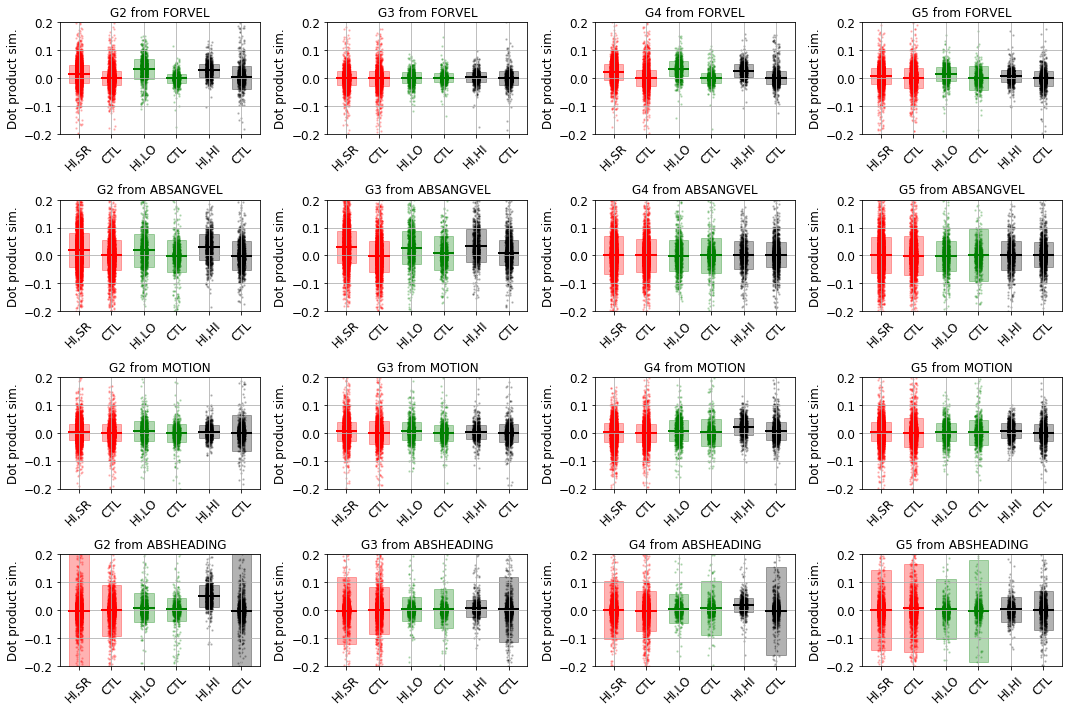

In [5]:
PAIRS = [
    ('CL_180_HighFlow_ACV', 'ASENSORY_AZ'),
    ('CL_180_HighFlow_ACV', 'CL_360_LOWFLOW_ACV'),
    ('CL_180_HighFlow_ACV', 'CL_180_HighFlow_ACV'),
]

COLORS = {
    ('CL_180_HighFlow_ACV', 'ASENSORY_AZ'): 'r',
    ('CL_180_HighFlow_ACV', 'CL_360_LOWFLOW_ACV'): 'g',
    ('CL_180_HighFlow_ACV', 'CL_180_HighFlow_ACV'): 'k',
}

LABELS = {
    ('CL_180_HighFlow_ACV', 'ASENSORY_AZ'): 'HI,SR',
    ('CL_180_HighFlow_ACV', 'CL_360_LOWFLOW_ACV'): 'HI,LO',
    ('CL_180_HighFlow_ACV', 'CL_180_HighFlow_ACV'): 'HI,HI',
}

fig, axs = plt.subplots(len(SRCS), len(TARGS), figsize=(15, 10), tight_layout=True)

for p_ctr, (expt_0, expt_1) in enumerate(PAIRS):
    df_cols = ['{}_FROM_{}'.format(targ, src) for targ, src in c_product(TARGS, SRCS)] +\
        ['{}_FROM_{}_CTL'.format(targ, src) for targ, src in c_product(TARGS, SRCS)]
    df_data = {}
    for src, ax_row in zip(SRCS, axs):
        for targ, ax in zip(TARGS, ax_row):
            
            # load filters for both expts
            hs_0 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_0, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            hs_1 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_1, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            smtys = hs_0.dot(hs_1.T)
            if expt_0 == expt_1:
                smtys[np.triu(np.ones((len(hs_0), len(hs_0)), bool), k=-1)] = np.nan

            smtys = smtys.flatten()
            df_data['{}_FROM_{}'.format(targ, src)] = smtys
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr + np.random.uniform(-.1, .1, len(smtys))
            ax.scatter(xs, smtys, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean = np.array([np.nanmean(smtys), np.nanmean(smtys)])
            y_std = np.array([np.nanstd(smtys), np.nanstd(smtys)])
            
            ax.plot([2*p_ctr-.3, 2*p_ctr+.3], [np.nanmean(smtys), np.nanmean(smtys)], lw=2, color=c)
            ax.fill_between([2*p_ctr-.3, 2*p_ctr+.3], y_mean-y_std, y_mean+y_std, color=c, alpha=.3)
            
            # calc and plot shuffled data
            hs_1_ctl = pd.read_csv(os.path.join(
                LOAD_DIR_CTL, '{}_{}_FROM_{}_{}.csv'.format(expt_1, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values
            
            smtys_ctl = hs_0.dot(hs_1_ctl.T)
            if expt_0 == expt_1:
                np.fill_diagonal(smtys_ctl, np.nan)

            smtys_ctl = smtys_ctl.flatten()
            
            df_data['{}_FROM_{}_CTL'.format(targ, src)] = smtys_ctl
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr+1 + np.random.uniform(-.1, .1, len(smtys_ctl))
            ax.scatter(xs, smtys_ctl, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean_ctl = np.array([np.nanmean(smtys_ctl), np.nanmean(smtys_ctl)])
            y_std_ctl = np.array([np.nanstd(smtys_ctl), np.nanstd(smtys_ctl)])
            
            ax.plot([2*p_ctr+1-.3, 2*p_ctr+1+.3], [y_mean_ctl, y_mean_ctl], lw=2, color=c)
            ax.fill_between([2*p_ctr+1-.3, 2*p_ctr+1+.3], y_mean_ctl-y_std_ctl, y_mean_ctl+y_std_ctl, color=c, alpha=.3)
            
            ax.set_ylim(-.2, .2)
            ax.set_title('{} from {}'.format(targ, src))
            
            t_val, p_val = stats.ttest_ind(smtys[~np.isnan(smtys)], smtys_ctl[~np.isnan(smtys_ctl)])
            
            print(
                '{} VS {}, {}_FROM_{}:'.format(expt_0, expt_1, targ, src),
                'T = {0:.4f}, P = {1}'.format(t_val, p_val))
            
    df = pd.DataFrame(data=df_data, columns=df_cols)
    df.to_csv(os.path.join(
        SAVE_DIR, 'FILTER_COMPARISONS_{}_VS_{}_{}.csv'.format(expt_0, expt_1, SFX)), index=False, na_rep='NaN')
    
for ax in axs.flatten():
    ax.set_xticks(range(2*len(PAIRS)))
    ax.set_xticklabels(sum([[LABELS[pair], 'CTL'] for pair in PAIRS], []), rotation=45)
    ax.set_ylabel('Dot product sim.')
    ax.grid()
    set_font_size(ax, 12)
    
fig.savefig(os.path.join(SAVE_DIR, 'FILTER_COMPARISONS_{}_VS_OTHERS_{}.png'.format(expt_0, SFX)), dpi=150)